# Add Timestamp as Features

In [1]:
%run Pre.py

/home/jiashen/env3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train_f['year'] = train_f['timestamp'].apply(lambda x:int(x.split('-')[0]))
train_f['month'] = train_f['timestamp'].apply(lambda x:int(x.split('-')[1]))
train_f['day'] = train_f['timestamp'].apply(lambda x:int(x.split('-')[2]))
test_f['year'] = test_f['timestamp'].apply(lambda x:int(x.split('-')[0]))
test_f['month'] = test_f['timestamp'].apply(lambda x:int(x.split('-')[1]))
test_f['day'] = test_f['timestamp'].apply(lambda x:int(x.split('-')[2]))

In [3]:
del train_f['timestamp']
del test_f['timestamp']

In [4]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}
# For Training
dtrain= xgb.DMatrix(train_f,label_train)
dtest = xgb.DMatrix(test_f)

In [5]:
xgb_cvalid = xgb.cv(xgb_params, dtrain, num_boost_round=1000, early_stopping_rounds=20,
    verbose_eval=50, show_stdv=False)
xgb_cvalid[['train-rmse-mean', 'test-rmse-mean']].plot()

[0]	train-rmse:8.20593e+06	test-rmse:8.20865e+06
[50]	train-rmse:2.53347e+06	test-rmse:2.90549e+06
[100]	train-rmse:2.18658e+06	test-rmse:2.72017e+06
[150]	train-rmse:2.05899e+06	test-rmse:2.67792e+06
[200]	train-rmse:1.96572e+06	test-rmse:2.65467e+06
[250]	train-rmse:1.89044e+06	test-rmse:2.64367e+06
[300]	train-rmse:1.82087e+06	test-rmse:2.63532e+06
[350]	train-rmse:1.75966e+06	test-rmse:2.62876e+06
[400]	train-rmse:1.70577e+06	test-rmse:2.62534e+06
[450]	train-rmse:1.65833e+06	test-rmse:2.62324e+06


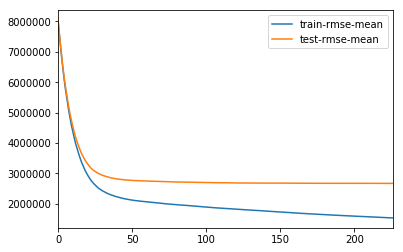

In [33]:
import matplotlib.pyplot as plt
plt.show()

In [6]:
## Train Splitted Dataset
num_boost_rounds = len(xgb_cvalid)
print(num_boost_rounds)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round= num_boost_rounds)

445


2480957.40292


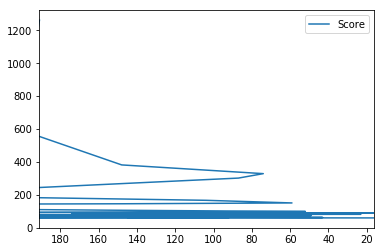

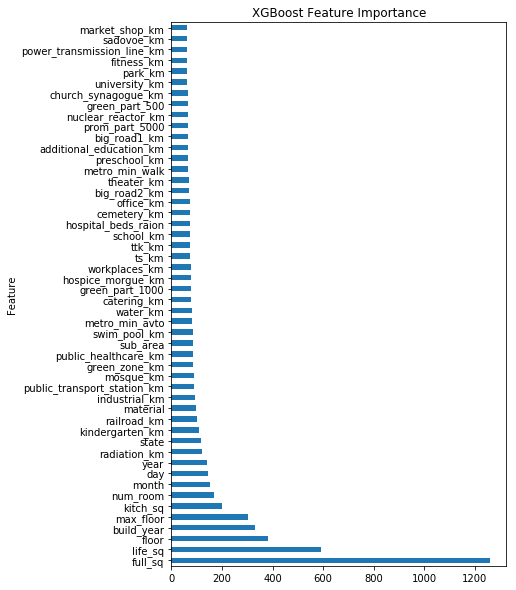

In [8]:
FImportance = get_feature_importance(model).iloc[0:50,]
plt.figure()
FImportance.plot()
FImportance.plot(kind='barh', x='Feature', y='Score', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')
plt.show()

In [9]:
FI_Acu = get_feature_importance(model)

In [10]:
for i in range(FI_Acu.shape[0]):
    if i ==0:
        FI_Acu.iloc[i,1] = FI_Acu.iloc[i,1]
    else:
        FI_Acu.iloc[i,1] = FI_Acu.iloc[i-1,1]+FI_Acu.iloc[i,1]

In [11]:
FI_Acu['Percentage'] = FI_Acu['Score']/max(FI_Acu['Score'])

In [12]:
FI_Acu.to_csv('Basemodel_FScore.csv',index=False)

In [13]:
Prediction = model.predict(dtest)
test_id = test['id']
submission = pd.DataFrame({'id':test_id,'price_doc':Prediction})
#submission.to_csv('Submission_xgb6.csv')

In [15]:
submission.to_csv('Submission_withymd.csv',index=False)